<a href="https://colab.research.google.com/github/aksaksham108/DiabetesPredictionModel/blob/main/DiabetesPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [156]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler #standarize the data
from sklearn.model_selection import train_test_split #separtin of training and testing data
from sklearn import svm #training model
from sklearn.metrics import accuracy_score #evaluation

In [157]:
# loading the diabetes dataset into pandas DataFrame
diabetes_dataset = pd.read_csv('diabetes_dataset.csv')

In [158]:
# from google.colab import drive
# drive.mount('/content/drive')

In [159]:
# pd.read_csv?

In [160]:
diabetes_dataset.fillna(diabetes_dataset.mean(numeric_only=True), inplace=True)  # Fill missing values with mean
# diabetes_dataset.dropna(inplace=True)  # Drop missing values

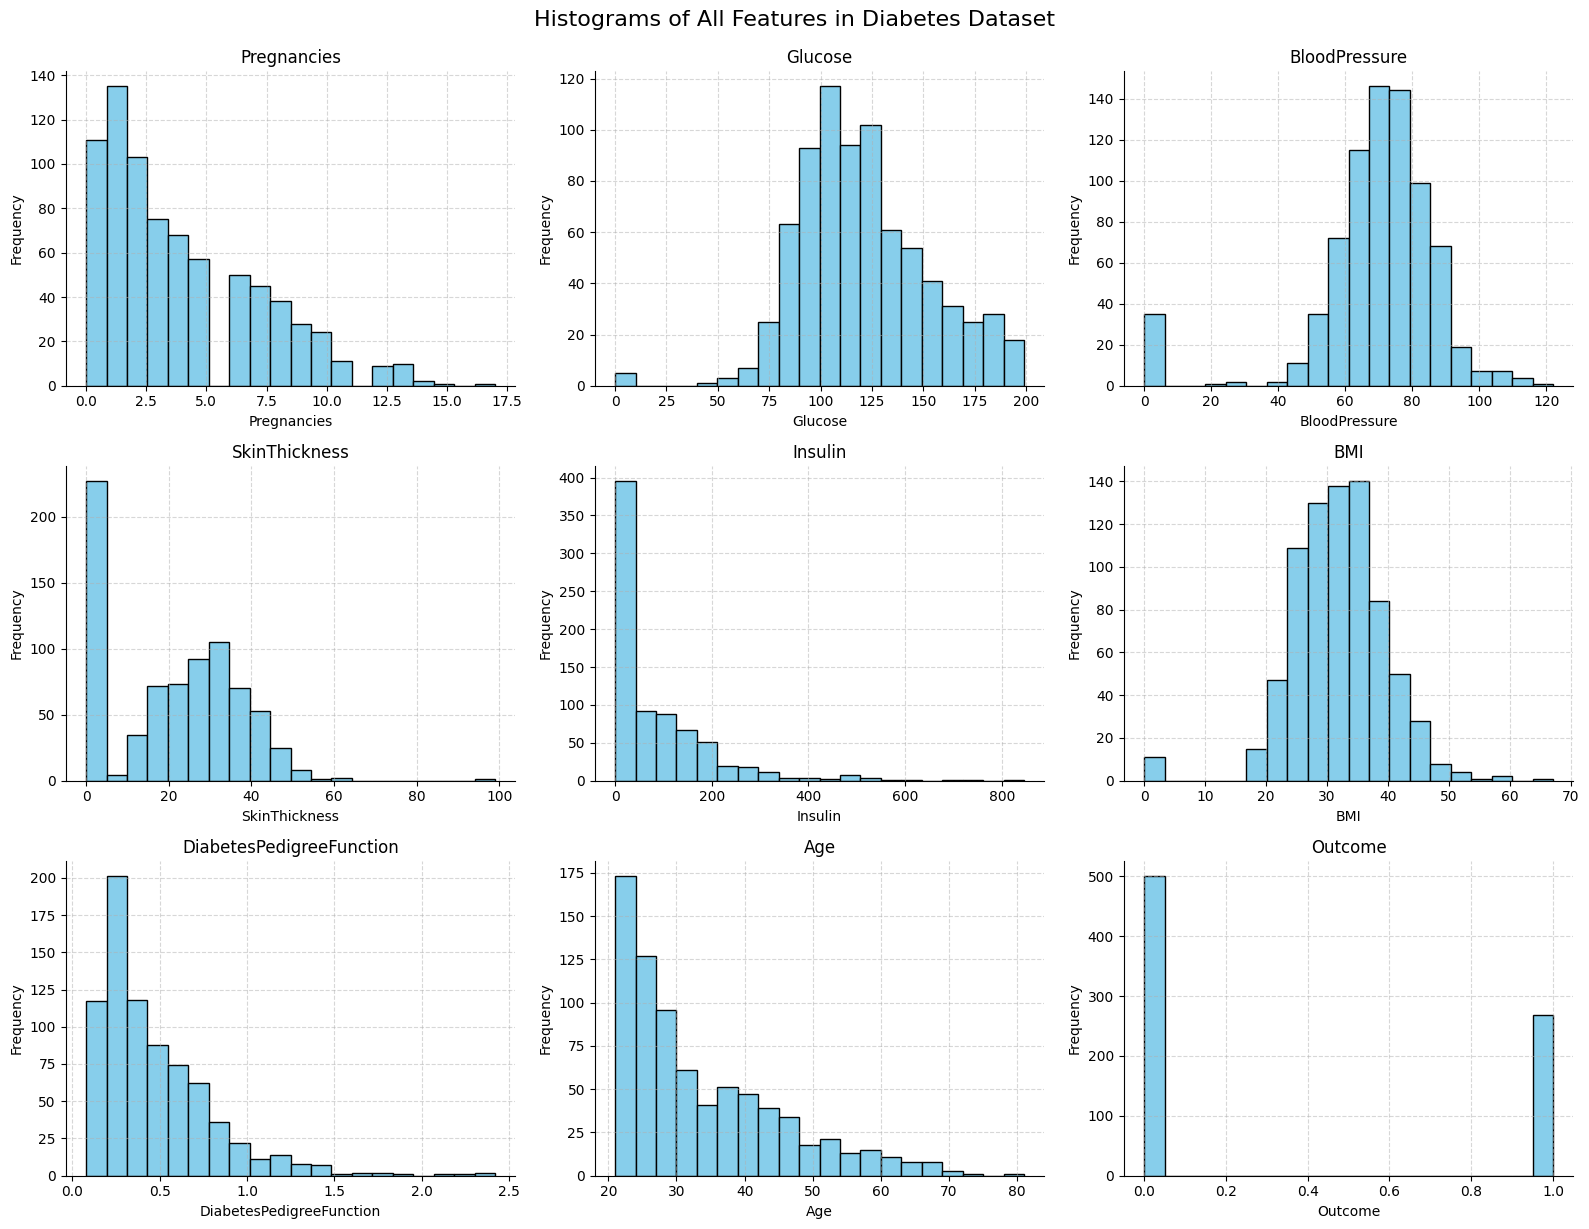

In [161]:
import matplotlib.pyplot as plt

# Define number of features
features = diabetes_dataset.columns

# Set figure size based on number of plots
plt.figure(figsize=(16, 12))

# Plot each feature in a subplot
for i, col in enumerate(features):
    plt.subplot(3, 3, i + 1)  # 3x3 grid for 9 columns
    plt.hist(diabetes_dataset[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'{col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.gca().spines[['top', 'right']].set_visible(False)

plt.tight_layout()
plt.suptitle('Histograms of All Features in Diabetes Dataset', fontsize=16, y=1.02)
plt.show()


In [162]:
# first 5 rows
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [163]:
# Last 5 rows
diabetes_dataset.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [164]:
# Summary of dataset
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [165]:
#statistical summary
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [166]:
#tells us the number of rows and columns
diabetes_dataset.shape

(768, 9)

In [167]:
diabetes_dataset.sort_values('Insulin', ascending=False)  # Sort by column

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
13,1,189,60,23,846,30.1,0.398,59,1
228,4,197,70,39,744,36.7,2.329,31,0
247,0,165,90,33,680,52.3,0.427,23,0
584,8,124,76,24,600,28.7,0.687,52,1
409,1,172,68,49,579,42.4,0.702,28,1
...,...,...,...,...,...,...,...,...,...
160,4,151,90,38,0,29.7,0.294,36,0
269,2,146,0,0,0,27.5,0.240,28,1
398,3,82,70,0,0,21.1,0.389,25,0
399,3,193,70,31,0,34.9,0.241,25,1


from matplotlib import pyplot as plt
_df_64['Pregnancies'].plot(kind='hist', bins=20, title='Pregnancies')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_65['Glucose'].plot(kind='hist', bins=20, title='Glucose')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_66['BloodPressure'].plot(kind='hist', bins=20, title='BloodPressure')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_67['SkinThickness'].plot(kind='hist', bins=20, title='SkinThickness')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_68.plot(kind='scatter', x='Pregnancies', y='Glucose', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_69.plot(kind='scatter', x='Glucose', y='BloodPressure', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_70.plot(kind='scatter', x='BloodPressure', y='SkinThickness', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_71.plot(kind='scatter', x='SkinThickness', y='Insulin', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_72['Pregnancies'].plot(kind='line', figsize=(8, 4), title='Pregnancies')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_73['Glucose'].plot(kind='line', figsize=(8, 4), title='Glucose')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_74['BloodPressure'].plot(kind='line', figsize=(8, 4), title='BloodPressure')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_75['SkinThickness'].plot(kind='line', figsize=(8, 4), title='SkinThickness')
plt.gca().spines[['top', 'right']].set_visible(False)

In [168]:
diabetes_dataset['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


0 --> NON-DIABETIC

1 --> DIABETIC

In [169]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


from matplotlib import pyplot as plt
_df_48['Pregnancies'].plot(kind='hist', bins=20, title='Pregnancies')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_49['Glucose'].plot(kind='hist', bins=20, title='Glucose')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_50['BloodPressure'].plot(kind='hist', bins=20, title='BloodPressure')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_51['SkinThickness'].plot(kind='hist', bins=20, title='SkinThickness')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_52.plot(kind='scatter', x='Pregnancies', y='Glucose', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_53.plot(kind='scatter', x='Glucose', y='BloodPressure', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_54.plot(kind='scatter', x='BloodPressure', y='SkinThickness', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_55.plot(kind='scatter', x='SkinThickness', y='Insulin', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Pregnancies']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Pregnancies'}, axis=1)
              .sort_values('Pregnancies', ascending=True))
  xs = counted['Pregnancies']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_56.sort_values('Pregnancies', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Pregnancies')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Glucose']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Glucose'}, axis=1)
              .sort_values('Glucose', ascending=True))
  xs = counted['Glucose']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_57.sort_values('Glucose', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Glucose')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['BloodPressure']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'BloodPressure'}, axis=1)
              .sort_values('BloodPressure', ascending=True))
  xs = counted['BloodPressure']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_58.sort_values('BloodPressure', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('BloodPressure')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['SkinThickness']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'SkinThickness'}, axis=1)
              .sort_values('SkinThickness', ascending=True))
  xs = counted['SkinThickness']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_59.sort_values('SkinThickness', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('SkinThickness')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_60['Pregnancies'].plot(kind='line', figsize=(8, 4), title='Pregnancies')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_61['Glucose'].plot(kind='line', figsize=(8, 4), title='Glucose')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_62['BloodPressure'].plot(kind='line', figsize=(8, 4), title='BloodPressure')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_63['SkinThickness'].plot(kind='line', figsize=(8, 4), title='SkinThickness')
plt.gca().spines[['top', 'right']].set_visible(False)

In [170]:
# separating the labels and data
X = diabetes_dataset.drop(columns = 'Outcome', axis=1) # axis=0 (row) and axis=1 (column)
Y = diabetes_dataset['Outcome']

In [171]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [172]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Data Standardization --> It means the data is in range from (0 to 1) or (-1 to 1).

In [173]:
scaler = StandardScaler()

In [174]:
standardized_data = scaler.fit_transform(X)

In [175]:
X= standardized_data
Y = diabetes_dataset['Outcome']

Train Test Split

In [176]:
print(X)
print(Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [177]:
# test size means 20 % for testing and rest 80% for training the model.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=2)

In [178]:
print(X.shape, X_train.shape, X_test.shape)
print(Y.shape, Y_train.shape, Y_test.shape)

(768, 8) (614, 8) (154, 8)
(768,) (614,) (154,)


Training the Model

In [179]:
# SVC - Support Vector Classifier (function of svm module of sklearn library)
classifier = svm.SVC(kernel='linear')

In [180]:
#training the support vector machine classifier(model)
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

Model Evaluation

Accuracy Store

In [181]:
#accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [182]:
print('Accuracy of the training data: ',training_data_accuracy)

Accuracy of the training data:  0.7866449511400652


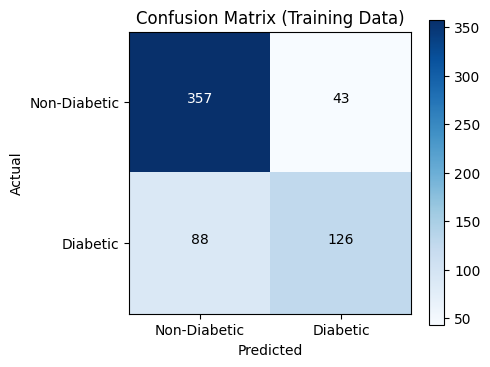

In [183]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_train, X_train_prediction)

# Plot confusion matrix
plt.figure(figsize=(5, 4))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Training Data)')
plt.colorbar()

# Tick labels
classes = ['Non-Diabetic', 'Diabetic']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

# Add numbers inside the squares
for i in range(len(cm)):
    for j in range(len(cm[0])):
        plt.text(j, i, str(cm[i, j]),
                 horizontalalignment='center',
                 color='white' if cm[i, j] > cm.max()/2 else 'black')

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

In [184]:
#accuracy score on the testing data
X_test_prediction = classifier.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [185]:
print('Accuracy of the testing data: ',testing_data_accuracy)

Accuracy of the testing data:  0.7727272727272727


Making a Predicting System

In [186]:
# example for non-diabetic
input_data = (1,103,30,38,83,43.3,0.183,33)

# example for diabetic
# input_data = (8,183,64,0,0,23.3,0.672,32)

# chainging input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

#standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[-0.84488505 -0.56004775 -2.02166474  1.09545411  0.02778979  1.43512945
  -0.87244072 -0.0204964 ]]
[0]
The person is not diabetic


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [188]:
# # Ensure input data is a NumPy array
# input_data = np.asarray(input_data)

# # Calculate average feature values for diabetic and non-diabetic (excluding 'Outcome')
# diabetic_avg = diabetes_dataset[diabetes_dataset['Outcome'] == 1].drop(columns='Outcome').mean()
# non_diabetic_avg = diabetes_dataset[diabetes_dataset['Outcome'] == 0].drop(columns='Outcome').mean()

# # Feature names (without Outcome)
# features = diabetes_dataset.columns[:-1]

# # Prepare x-axis positions
# x = np.arange(len(features))
# width = 0.25

# # Plot the comparison
# plt.figure(figsize=(14, 6))
# plt.bar(x - width, non_diabetic_avg, width, label='Non-Diabetic Avg', color='green', alpha=0.6)
# plt.bar(x, diabetic_avg, width, label='Diabetic Avg', color='red', alpha=0.6)
# plt.bar(x + width, input_data, width, label='Input Person', color='blue', alpha=0.6)

# plt.xlabel('Features')
# plt.ylabel('Value')
# plt.title('Health Profile Comparison')
# plt.xticks(x, features, rotation=45)
# plt.legend()
# plt.tight_layout()
# plt.grid(axis='y', linestyle='--', alpha=0.5)
# plt.show()